# Example 1: Non Isothermal CSTR
----

## Importing Libraries

---

In [1]:
# Importing all the required libraries
import gym
import random
import numpy as np
import pandas as pd
import os
import datetime
import pytz
from IPython.display import display, Math

## Creating an Instance of a Gym Environment

---

In [2]:
# Creating an Instance of the gym environment 
env = gym.make('gym_tf:tf-v0')
observation = env.reset()

## Setting Simulation Parameters

---

### 1.Defining the Process

In [3]:
#Transfer Function of the Process
env.set_Process([-6.07, -45.83],[1, 1.79, 35.8])

#Display the Default Process Transfer Function
env.get_Process()


  -6.07 s - 45.83
-------------------
s^2 + 1.79 s + 35.8

### 2.Setting Magnitude of the SP signal

In [4]:
# Setting the magnitute of the set point of the setpoint signal
env.set_setpoint(2)

# Displaying the magnitute of the set point of the setpoint signal
env.get_setpoint()

2

### 3.Setting Type of Setpoint Signal

In [5]:
# Setting the setpoint signal to square wave
# 1 - Constant
# 2 - Square 
# 3 - Sawtooth
# 4 - Triangular
# 5 - Custom Pulse 1
# 6 - Custom Pulse 2
# 7 - Custom Pulse 3

env.set_SP_sgn_type(1)

# Printing the signal type
env.get_SP_sgn_type()

'Constant'

### 4.Setpoint Signal Frequency

In [6]:
# Setting the frequency of the setpoint signal
env.set_SP_Freq(0.125)

# Printing the frequency of the setpoint signal
env.get_SP_Freq()

0.125

### 5.Phase of Setpoint signal

In [7]:
# Setting the frequency of the setpoint phase
env.set_SP_Phase(0)

# Printing the frequency of the setpoint phase
env.get_SP_Phase()

0

### 6.MSE Thresh For agent

In [8]:
env.set_MSE_thresh(0.075)

env.get_MSE_thresh()

0.075

## Setpoint Signal Available

----

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 130

### Setpoint Signal 1, 2, 3, 4

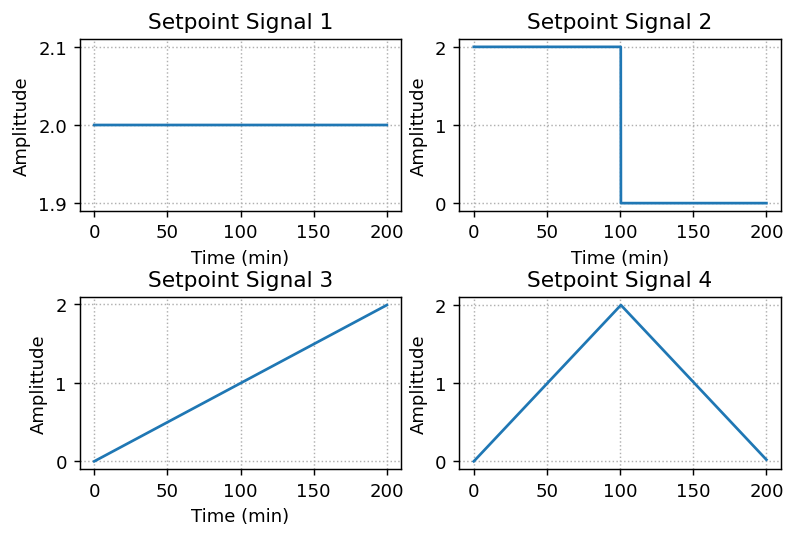

In [10]:
# Create a figure
Figure = plt.figure()

# Create a grid space
grdspc = Figure.add_gridspec(2, 2)

# Create axes to plt graphs
ax1 = Figure.add_subplot(grdspc[0, 0])
ax2 = Figure.add_subplot(grdspc[0, 1])
ax3 = Figure.add_subplot(grdspc[1, 0])
ax4 = Figure.add_subplot(grdspc[1, 1])

# Ploting the setpoint signals
ax1.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(1))
ax2.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(2))
ax3.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(3))
ax4.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(4))

# Adding the Title
ax1.set_title('Setpoint Signal 1')
ax2.set_title('Setpoint Signal 2')
ax3.set_title('Setpoint Signal 3')
ax4.set_title('Setpoint Signal 4')

# Adding the X axis label
ax1.set_xlabel('Time (min)')
ax2.set_xlabel('Time (min)')
ax3.set_xlabel('Time (min)')
ax3.set_xlabel('Time (min)')

# Adding the X axis label
ax1.set_ylabel('Amplittude')
ax2.set_ylabel('Amplittude')
ax3.set_ylabel('Amplittude')
ax4.set_ylabel('Amplittude')

# Adding space around the subplots
Figure.tight_layout(pad=0.2)

# Enabling Grid on the plots
ax1.grid('True', linestyle=":")
ax2.grid('True', linestyle=":")
ax3.grid('True', linestyle=":")
ax4.grid('True', linestyle=":")

### Setpoint Signal 5

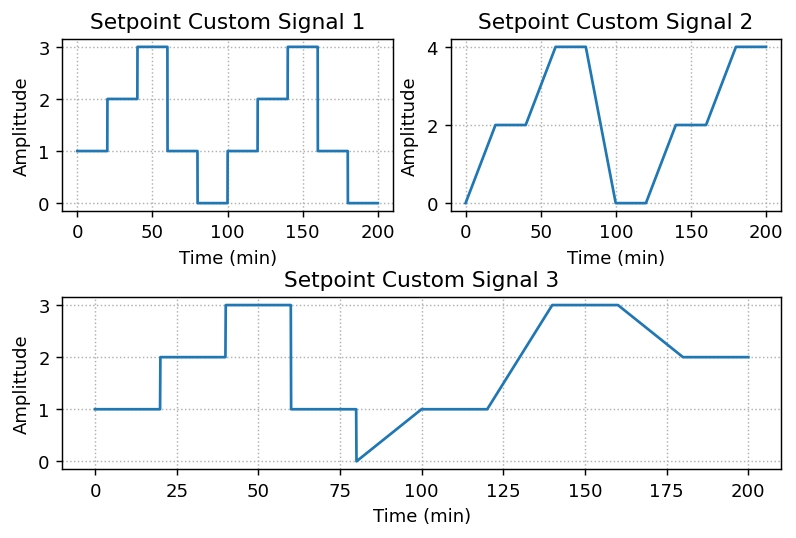

In [11]:
# Create a figure
Figure = plt.figure()

# Create a grid space
grdspc = Figure.add_gridspec(2, 2)

# Create axes to plt graphs
ax1 = Figure.add_subplot(grdspc[0,0])
ax2 = Figure.add_subplot(grdspc[0,1])
ax3 = Figure.add_subplot(grdspc[1,:])

# Ploting the setpoint signals
ax1.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(5))
ax2.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(6))
ax3.plot(np.linspace(0, env.get_sim_time(), 10*env.get_sim_time()),env.get_SP_sgn(7))

# Adding the Title
ax1.set_title('Setpoint Custom Signal 1')
ax2.set_title('Setpoint Custom Signal 2')
ax3.set_title('Setpoint Custom Signal 3')

# Adding the X axis label
ax1.set_xlabel('Time (min)')
ax2.set_xlabel('Time (min)')
ax3.set_xlabel('Time (min)')

# Adding the X axis label
ax1.set_ylabel('Amplittude')
ax2.set_ylabel('Amplittude')
ax3.set_ylabel('Amplittude')

# Adding space around the subplots
Figure.tight_layout(pad=0.2)

# Enabling Grid on the plots
ax1.grid('True', linestyle=":")
ax2.grid('True', linestyle=":")
ax3.grid('True', linestyle=":")

## Discretizing the continuous Observation Space and Action Space into 50 parts

---

In [12]:
#Preo processing and Initializing the Q-Table
# Number of actions available in the environment
action_space_size = env.action_space.n

# Converting the Continuous Observation Space into Discrete Space
# Size of Discrete space
Discrete_Obs_Size = [50]*len(env.observation_space.high)
# Creating a Discrete
Discrete_Obs_Win_Size = (env.observation_space.high - env.observation_space.low) / Discrete_Obs_Size

# Number of states available in the environment
state_space_size = Discrete_Obs_Win_Size

## Creating and Initializing a Q Table or reading a existing Q-Table

---

### Creating a New Q-Table

In [ ]:
# Creating a Q-Table (Size of Q-Table = [no. of actions x no. of states])
q_table = np.random.uniform(low=0, high=5, size=(Discrete_Obs_Size + [action_space_size]))

# Print the shape of initialized Q-Table
print(q_table.shape)

### Reading an existing Q-Table

In [14]:
# Reading an existing Q-Table
q_table = np.load('Q-Table_1.npy')

# Print the shape of initialized Q-Table
print(q_table.shape)

(50, 50, 50, 50, 27)


## Defining the Hyperparameters

---

In [15]:
# Defining all the hyper parameters
num_episodes = 5000
max_steps_per_episode = 40

learning_rate = 0.2
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

## Perfomance Metrics

---

In [16]:
Iteration = []
rewards_all_episodes = []
Final_Error = []
Initial_Error = []

Avg_Reward = []
Avg_Win_Reward = []
Avg_Error = []
Avg_Win_Error = []

K_p = []
K_i = []
K_d = []

## Function to convert continuous state into the Discrete State

---

In [17]:
# Function to convert continuous space into descrete space
def get_discrete_state(state):
    discrete_state = (list(state) - env.observation_space.low) / Discrete_Obs_Win_Size
    if discrete_state[0] >= 50: 
        discrete_state[0] = 49
    if discrete_state[1] >= 50: 
        discrete_state[1] = 49
    if discrete_state[2] >= 50: 
        discrete_state[2] = 49
    if discrete_state[3] >= 50: 
        discrete_state[3] = 49
    return tuple(discrete_state.astype(np.uint32))

## Resetting the Environment

---

_This is to update all the setting changes like simulation settings, process transfer function etc_.

In [18]:
# Resetting the environment
print(env.reset())

[1.30000000e+01 4.00000000e+00 1.50000000e+01 1.22898697e-04]


## Q Learning Algorithm

----

In [ ]:
UPDATE_RATE = 100

Iteration = np.arange(0, num_episodes, UPDATE_RATE).tolist()

# Q-learning algorithm
for episode in range(num_episodes):
    
    # initialize new episode params
    # Resetting the environment
    state = get_discrete_state(env.reset())

    # Logging Initial Error
    Initial_Error.append(state[-1])
    
    # Reseting the Episode Exit Flag
    done = False

    # Initializing the reward
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        # Drawing a randomn number between 0 to 1
        exploration_rate_threshold = random.uniform(0, 1)

        # If Randomly drawn number is greater than exploration rate explore or exploit 
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()
    
        # Take new action
        new_state, reward, done, info = env.step(action)

        # Update Q-table
        q_table[state + (action,)] = q_table[state + (action,)] * (1 - learning_rate) + \
    learning_rate * (reward + discount_rate * np.max(q_table[get_discrete_state(new_state)+(action,)]))

        # Set new state
        state = get_discrete_state(new_state)

        # Add new reward     
        rewards_current_episode += reward

        # If Exit flag is set exit the current episode
        if done == True: 
            break
            
    # Exploration rate decay 
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

    # Logging Initial Error
    Final_Error.append(state[-1])
    
    # Displaying Information
    if (int(episode+1) % UPDATE_RATE == 0):
        print("Iter: {}\t Avg. Rwd Last {} Iter: {}\t Avg. Rwd: {}\t Avg. Err Last {} Iter: {}\t Avg. Err: {}.".format(str(episode+1), str(UPDATE_RATE), str(np.sum(np.array(rewards_all_episodes[-UPDATE_RATE:]))/UPDATE_RATE), str(np.sum(np.array(rewards_all_episodes))/len(rewards_all_episodes)), str(UPDATE_RATE), str(np.sum(np.array(Final_Error[-UPDATE_RATE:]))/UPDATE_RATE), str(np.sum(np.array(Final_Error))/len(Final_Error))))
        
        # Logging Average Reward and Error Over the window of latest re iterations
        Avg_Win_Reward.append(np.sum(np.array(rewards_all_episodes[-UPDATE_RATE:]))/UPDATE_RATE)
        Avg_Win_Error.append(np.sum(np.array(Final_Error[-UPDATE_RATE:]))/UPDATE_RATE)
        
        # Tracking PID Gains
        K_p.append(env.get_PID_Gains()[0])
        K_i.append(env.get_PID_Gains()[1])
        K_d.append(env.get_PID_Gains()[2])

        # Logging average reward and Error
        Avg_Reward.append(np.sum(np.array(rewards_all_episodes))/len(rewards_all_episodes))
        Avg_Error.append(np.sum(np.array(Final_Error))/len(Final_Error))

## Logging the Performance Metrics

---

In [ ]:
# Logging all the Information into a CSV File

# Creating a dataframe of all the variables to be logged
DataTable = pd.DataFrame({"Episodes" : Iteration, "Avg Reward" : Avg_Reward, "Avg Reward Over Last " + str(UPDATE_RATE) + "Values" : Avg_Win_Reward, "Avg Error" : Avg_Error, "Avg Error Over Last " + str(UPDATE_RATE) + "Values" : Avg_Win_Error})

# Getting today date and time
Curr_Time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))

# Creating a directory for storing generated data
dir = os.path.join(os.getcwd(),'Analysis_Data/')

# If the directory by the same name does not exist make the dirctory
if not os.path.exists(dir):
    os.mkdir(dir)

# Creating a name for the data file
Data_csv_filename = dir + 'Debug_Data' + '_' + str(Curr_Time.day) + '-' + str(Curr_Time.month) + '-' + str(Curr_Time.year) + '_' + str(Curr_Time.hour) + '-' + str(Curr_Time.minute) + '-' + str(Curr_Time.second) + '.xlsx'

# Converting the data to the file
DataTable.to_excel(Data_csv_filename, index=False)

#ErrorTable = pd.DataFrame({"Episodes" : np.arange(1, num_episodes+1, 1).tolist(), "Initial Error" : Initial_Error, "Final Error" : Final_Error})

# Creating a name for the data file
#Error_csv_filename = dir + 'Debug_Error_Data' + '_' + str(Curr_Time.day) + '-' + str(Curr_Time.month) + '-' + str(Curr_Time.year) + '_' + str(Curr_Time.hour) + '-' + str(Curr_Time.minute) + '-' + str(Curr_Time.second) + '.xlsx'

# Converting the data to the file
#ErrorTable.to_excel(Error_csv_filename, index=False)

## Performance of the Agent after Training

---

In [20]:
%matplotlib qt

# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table
No_Demo_Episodes = 3

for episode in range(No_Demo_Episodes):
    # initialize new episode params
    state = get_discrete_state(env.reset())
    done = False

    Test_Kp = []
    Test_Ki = []
    Test_Kd = []
    Test_Reward = []
    Test_MSE = []
    
    for step in range(max_steps_per_episode):        
        # Show current state of environment on screen
        if(step == 0 or step == (max_steps_per_episode - 1)):
            env.render(2,1,1,0)
        else:
            env.render(2,1,1,0)

        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state])        

        # Take new action
        new_state, reward, done, info = env.step(action)

        #if done:
        #    env.render(2,1,1,1)


        # Set new state
        state = get_discrete_state(new_state)
        
        # Logging the data
        Test_Kp.append(env.get_PID_Gains()[0]) 
        Test_Ki.append(env.get_PID_Gains()[1]) 
        Test_Kd.append(env.get_PID_Gains()[2])
        Test_Reward.append(reward)
        Test_MSE.append(env.get_MSE())
        
        # Creating CSV File
        if(step == (max_steps_per_episode - 1)):
            
            #Creating Dataframe
            Test_Data = pd.DataFrame({"Kp" : Test_Kp, "Ki" : Test_Ki, "Kd" : Test_Kd, "Reward" : Test_Reward, "MSE" : Test_MSE})

            # Getting today date and time
            Curr_Time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))

            # Creating a directory for storing generated data
            dir = os.path.join(os.getcwd(),'Analysis_Data/')

            # If the directory by the same name does not exist make the dirctory
            if not os.path.exists(dir):
                os.mkdir(dir)

            # Creating a name for the data file
            Test_Data_filename = dir + env.get_SP_sgn_type() + '_' + str(episode+1) + '_' + str(Curr_Time.day) + '-' + str(Curr_Time.month) + '-' + str(Curr_Time.year) + '_' + str(Curr_Time.hour) + '-' + str(Curr_Time.minute) + '-' + str(Curr_Time.second) + '.xlsx'

            # Converting the data to the file
            #Test_Data.to_excel(Test_Data_filename, index=False)

env.close()

## Saving the The Q-Table for further training

---

**Note** - _The size occupied by the Q-Table can be quite large_. 

In [ ]:
np.save('Q-Table_1', q_table)